In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Importing Required Libraries

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt

##Sgd Optimizer Model

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3010, 28, 28, 1), Labels: (3010, 10)


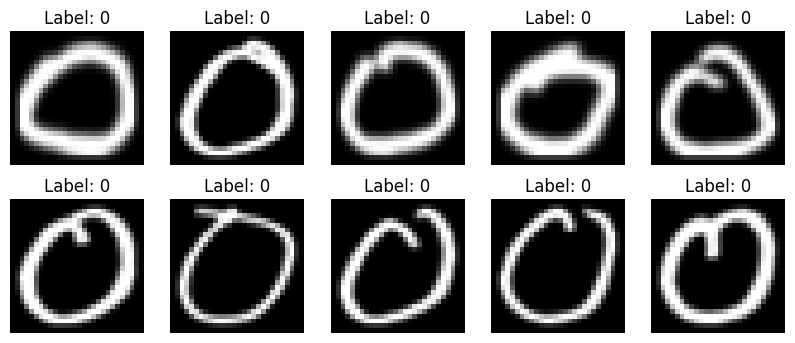

In [ ]:

# Define dataset paths
train_dir = "/content/drive/MyDrive/AI and ML/Week4/DevanagariHandwrittenDigitDataset/Train/"
test_dir = "/content/drive/MyDrive/AI and ML/Week4/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1]

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  # Fixed incorrect quotes
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()


In [ ]:
num_classes = 10
input_shape = (28*28, 1)
model = keras.Sequential(
[
keras.layers.Input(shape=input_shape),
keras.layers.Flatten(),
keras.layers.Dense(64, activation="sigmoid"),
keras.layers.Dense(128, activation="sigmoid"),
keras.layers.Dense(256, activation="sigmoid"),
keras.layers.Dense(num_classes, activation="softmax"),
]
)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
optimizer="sgd",
loss="categorical_crossentropy",
metrics=["accuracy"]
)

In [ ]:
x_train, y_train = shuffle(x_train, y_train, random_state=42)

batch_size = 128
epochs = 100

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience = 4,),
]

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split = 0.15,
    callbacks=callbacks,
)


Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0974 - loss: 2.3146 - val_accuracy: 0.0859 - val_loss: 2.3023
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1069 - loss: 2.3022 - val_accuracy: 0.0969 - val_loss: 2.3029
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1035 - loss: 2.3025 - val_accuracy: 0.1008 - val_loss: 2.3020
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1082 - loss: 2.3017 - val_accuracy: 0.0969 - val_loss: 2.3027
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1067 - loss: 2.3011 - val_accuracy: 0.1400 - val_loss: 2.2991
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1221 - loss: 2.3000 - val_accuracy: 0.1012 - val_loss: 2.2989
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1121 - loss: 2.2991 - val_accuracy: 0.0965 - val_loss: 2.2992
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1160 - loss: 2.2989 - val_ac

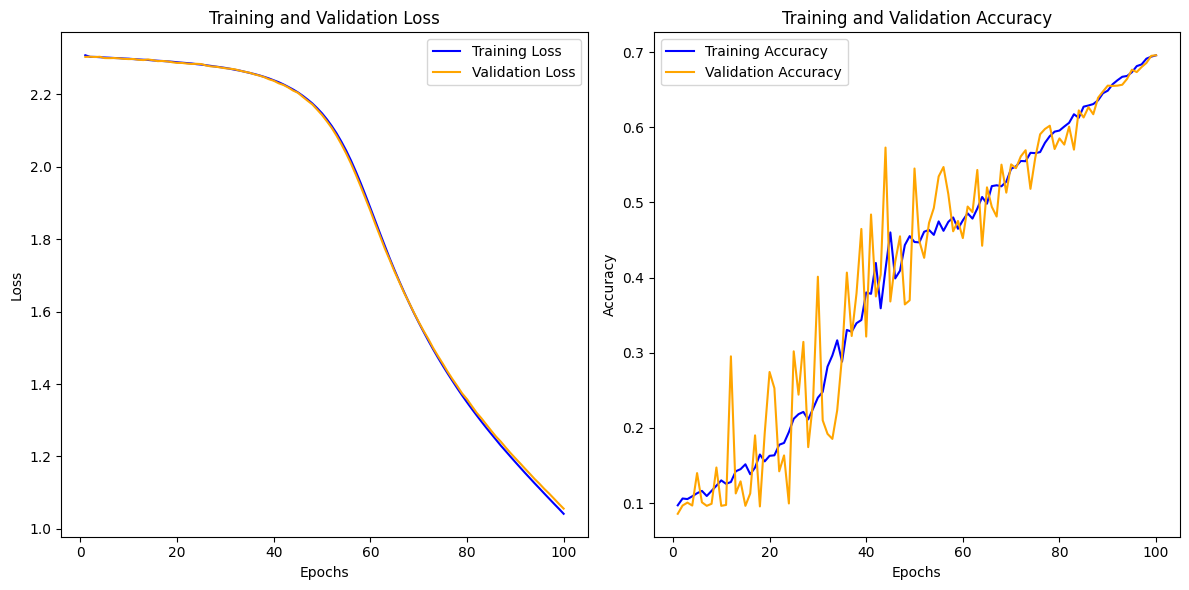

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


95/95 - 0s - 2ms/step - accuracy: 0.7000 - loss: 1.0323
Test Accuracy: 0.7000


In [ ]:
model.save("devnagari_digit_classifier.h5")

loaded_model = tf.keras.models.load_model("devnagari_digit_classifier.h5")

test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"Loaded Model Test Accuracy: {test_acc:.4f}")


95/95 - 1s - 6ms/step - accuracy: 0.7000 - loss: 1.0323
Loaded Model Test Accuracy: 0.7000


In [ ]:
predictions = model.predict(x_test)

predicted_labels = np.argmax(predictions, axis=1)

print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted label for first image: 0
True label for first image: 0


##Adam Optimizer Model

###Task 1 - Data Preparation

Training Data Shape: (13600, 784), Validation Shape: (3400, 784), Test Shape: (3010, 784)
One-hot Encoded Labels Shape: (13600, 10)


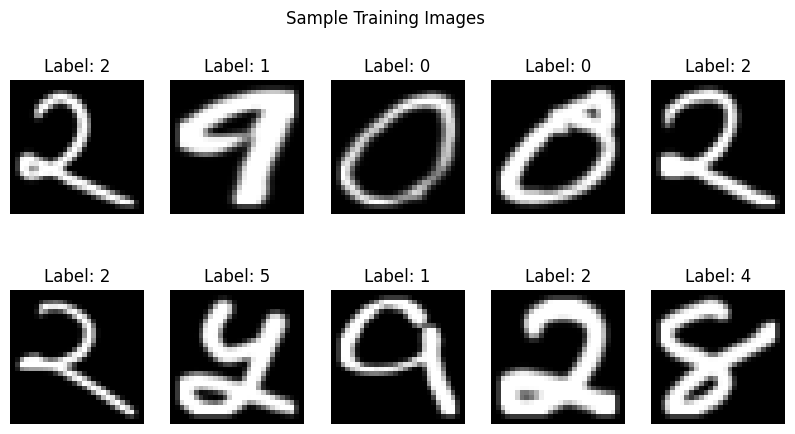

In [ ]:
train_dir = "/content/drive/MyDrive/AI and ML/Week4/DevanagariHandwrittenDigitDataset/Train/"
test_dir = "/content/drive/MyDrive/AI and ML/Week4/DevanagariHandwrittenDigitDataset/Test"

def load_images_from_folder(folder):
    images, labels = [], []
    classes = sorted(os.listdir(folder))
    class_map = {class_name: i for i, class_name in enumerate(classes)}

    for class_name in classes:
        class_folder = os.path.join(folder, class_name)
        if not os.path.isdir(class_folder):
            continue

        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            try:
                img = Image.open(image_path).convert('L')
                img = img.resize((28, 28))
                img = np.array(img) / 255.0
                images.append(img)
                labels.append(class_map[class_name])
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

    return np.array(images), np.array(labels)

x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Training Data Shape: {x_train.shape}, Validation Shape: {x_val.shape}, Test Shape: {x_test.shape}")
print(f"One-hot Encoded Labels Shape: {y_train.shape}")

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {np.argmax(y_train[i])}")
    ax.axis("off")

plt.suptitle("Sample Training Images")
plt.show()

###Task 2 - Building Fully Connected Neural Network Model

In [ ]:
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(28*28,)),
    Dense(128, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

###Task 3 - Compiling the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

###Task 4 - Train the Model

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras", save_best_only=True, monitor="val_loss"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience = 4, restore_best_weights=True)
]

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2190 - loss: 2.2195 - val_accuracy: 0.6529 - val_loss: 1.3307
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7347 - loss: 1.0614 - val_accuracy: 0.8188 - val_loss: 0.6207
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8370 - loss: 0.5261 - val_accuracy: 0.8724 - val_loss: 0.4217
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8895 - loss: 0.3684 - val_accuracy: 0.9070 - val_loss: 0.3252
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9223 - loss: 0.2664 - val_accuracy: 0.9213 - val_loss: 0.2606
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9415 - loss: 0.2112 - val_accuracy: 0.9312 - val_loss: 0.2224
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9543 - loss: 0.1659 - val_accuracy: 0.9382 - val_loss: 0.1976
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9644 - loss: 0.1373 - val_accuracy: 0.9449 - val_los

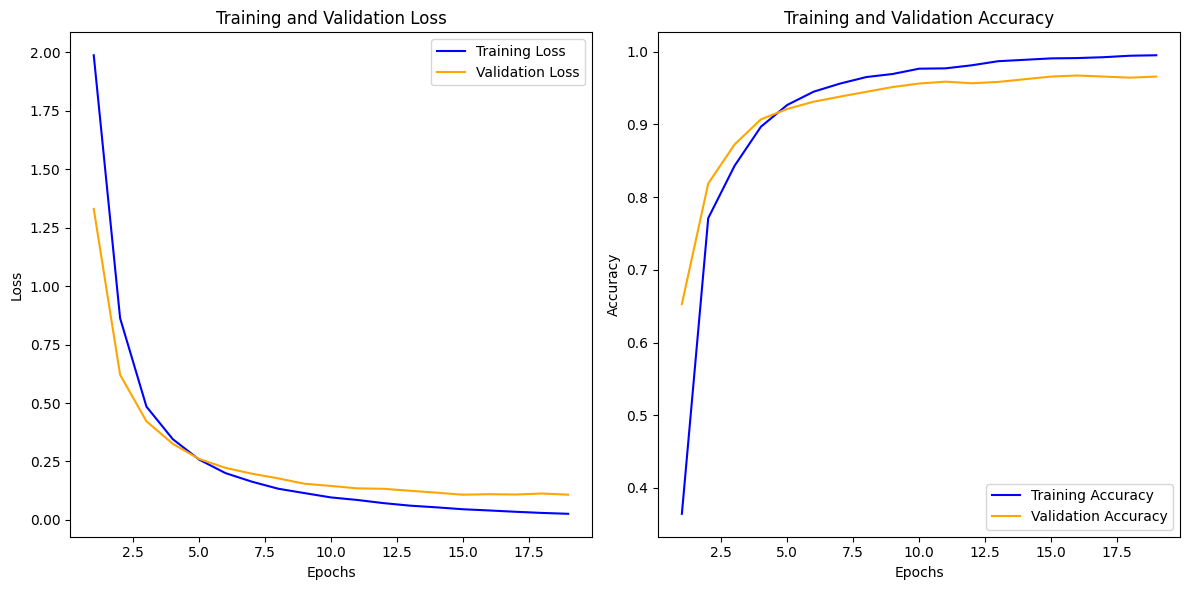

In [ ]:
# Assuming 'history' is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


###Task 5 - Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

95/95 - 0s - 2ms/step - accuracy: 0.9708 - loss: 0.1037
Test Accuracy: 0.9708
Test Loss: 0.1037


###Task 6 - Saving and Loading the Model

In [ ]:
model.save("devnagari_digit_classifier.h5")
print("Model saved successfully as 'devnagari_digit_classifier.h5'!")

loaded_model = tf.keras.models.load_model("devnagari_digit_classifier.h5")
print("Model loaded successfully!")

test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"Loaded Model Test Accuracy: {test_acc:.4f}")
print(f"Loaded Model Test Loss: {test_loss:.4f}")

Model saved successfully as 'devnagari_digit_classifier.h5'!
Model loaded successfully!
95/95 - 1s - 9ms/step - accuracy: 0.9708 - loss: 0.1037
Loaded Model Test Accuracy: 0.9708
Loaded Model Test Loss: 0.1037


###Task 7 - Making Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


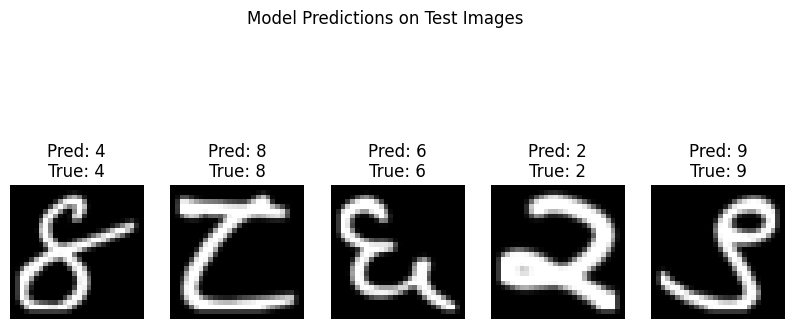

In [ ]:
num_samples = 5
random_indices = np.random.choice(len(x_test), num_samples, replace=False)
sample_images = x_test[random_indices]
sample_labels = y_test[random_indices]

predictions = loaded_model.predict(sample_images)

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(sample_labels, axis=1)

plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis("off")

plt.suptitle("Model Predictions on Test Images")
plt.show()